# Spotify Track Popularity

In [1]:
import mlflow
import pandas as pd
import seaborn as sns
from PIL.ImageOps import scale
from fastjsonschema.ref_resolver import normalize
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

## Import Data

In [2]:
df = pd.read_csv('spotify_data.csv')

## Explore Data

In [3]:
df.head()

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


In [5]:
df.drop('Unnamed: 0', axis=1, inplace=True)

## Overview of datatypes

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159764 entries, 0 to 1159763
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   artist_name       1159749 non-null  object 
 1   track_name        1159763 non-null  object 
 2   track_id          1159764 non-null  object 
 3   popularity        1159764 non-null  int64  
 4   year              1159764 non-null  int64  
 5   genre             1159764 non-null  object 
 6   danceability      1159764 non-null  float64
 7   energy            1159764 non-null  float64
 8   key               1159764 non-null  int64  
 9   loudness          1159764 non-null  float64
 10  mode              1159764 non-null  int64  
 11  speechiness       1159764 non-null  float64
 12  acousticness      1159764 non-null  float64
 13  instrumentalness  1159764 non-null  float64
 14  liveness          1159764 non-null  float64
 15  valence           1159764 non-null  float64
 16  

## Overview of genres

In [4]:
df['genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'ambient', 'black-metal',
       'blues', 'breakbeat', 'cantopop', 'chicago-house', 'chill',
       'classical', 'club', 'comedy', 'country', 'dance', 'dancehall',
       'death-metal', 'deep-house', 'detroit-techno', 'disco',
       'drum-and-bass', 'dub', 'dubstep', 'edm', 'electro', 'electronic',
       'emo', 'folk', 'forro', 'french', 'funk', 'garage', 'german',
       'gospel', 'goth', 'grindcore', 'groove', 'guitar', 'hard-rock',
       'hardcore', 'hardstyle', 'heavy-metal', 'hip-hop', 'house',
       'indian', 'indie-pop', 'industrial', 'jazz', 'k-pop', 'metal',
       'metalcore', 'minimal-techno', 'new-age', 'opera', 'party',
       'piano', 'pop', 'pop-film', 'power-pop', 'progressive-house',
       'psych-rock', 'punk', 'punk-rock', 'rock', 'rock-n-roll',
       'romance', 'sad', 'salsa', 'samba', 'sertanejo', 'show-tunes',
       'singer-songwriter', 'ska', 'sleep', 'songwriter', 'soul',
       'spanish', 'swedish', 'tango', 'tec

## Overview of missing data

In [7]:
df.isna().sum()

artist_name         15
track_name           1
track_id             0
popularity           0
year                 0
genre                0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
duration_ms          0
time_signature       0
dtype: int64

Missing Data: artist_name(15), track_name(1)

## Numeric analyzation of data

In [8]:
pd.set_option('display.float_format', '{:.4f}'.format)
df.describe()

,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1159764.0000,1159764.0000,1159764.0000,1159764.0000,1159764.0000,1159764.0000,1159764.0000,1159764.0000,1159764.0000,1159764.0000,1159764.0000,1159764.0000,1159764.0000,1159764.0000,1159764.0000
mean,18.3831,2011.9550,0.5374,0.6397,5.2878,-8.9814,0.6347,0.0928,0.3215,0.2523,0.2230,0.4556,121.3771,249561.7812,3.8859
std,15.8855,6.8039,0.1845,0.2705,3.5552,5.6822,0.4815,0.1268,0.3550,0.3651,0.2011,0.2685,29.7797,149426.1645,0.4677
min,0.0000,2000.0000,0.0000,0.0000,0.0000,-58.1000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2073.0000,0.0000
25%,5.0000,2006.0000,0.4130,0.4540,2.0000,-10.8290,0.0000,0.0371,0.0064,0.0000,0.0979,0.2260,98.7970,181091.0000,4.0000
50%,15.0000,2012.0000,0.5500,0.6940,5.0000,-7.4500,1.0000,0.0507,0.1470,0.0018,0.1340,0.4380,121.9310,225744.0000,4.0000
75%,29.0000,2018.0000,0.6770,0.8730,8.0000,-5.2760,1.0000,0.0890,0.6400,0.6140,0.2920,0.6740,139.9030,286913.5000,4.0000
max,100.0000,2023.0000,0.9930,1.0000,11.0000,6.1720,1.0000,0.9710,0.9960,1.0000,1.0000,1.0000,249.9930,6000495.0000,5.0000


## Categorize

In [9]:
numerical = [
    'popularity',
    'danceability',
    'energy',
    'loudness',
    'speechiness',
    'acousticness',
    'instrumentalness',
    'liveness',
    'valence',
    'tempo',
    'duration_ms'
]
categorical = [
    'year',
    'artist_name',
    'track_name',
    'track_id',
    'genre',
    'key',
    'time_signature',
    'mode'
]

## Data visualization

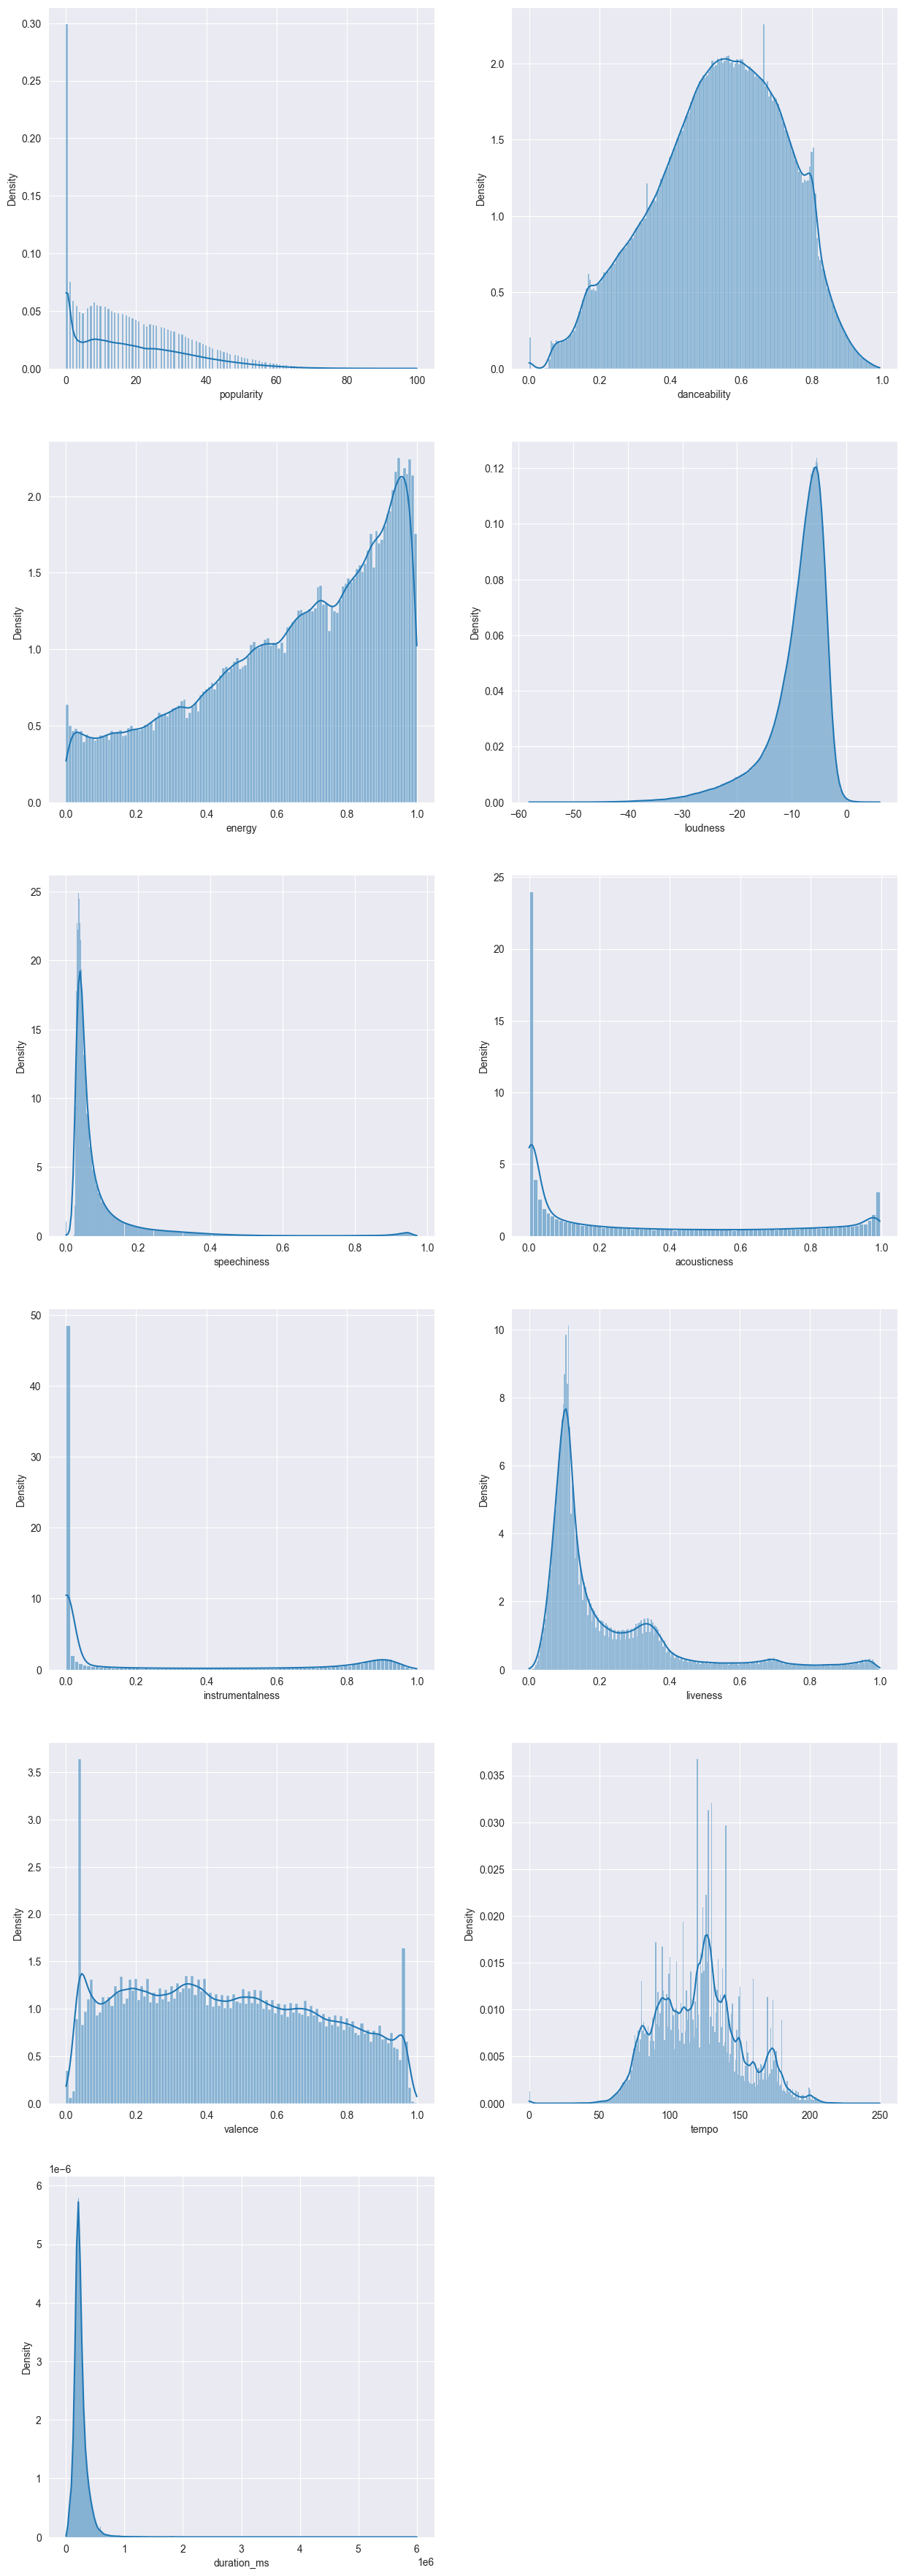

In [10]:
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(15, 45))
axes = axes.flatten()


for i , col in enumerate(numerical):
    sns.histplot(data=df, x=col, kde=True, stat='density', ax=axes[i])
fig.delaxes(axes[11])

<Axes: >

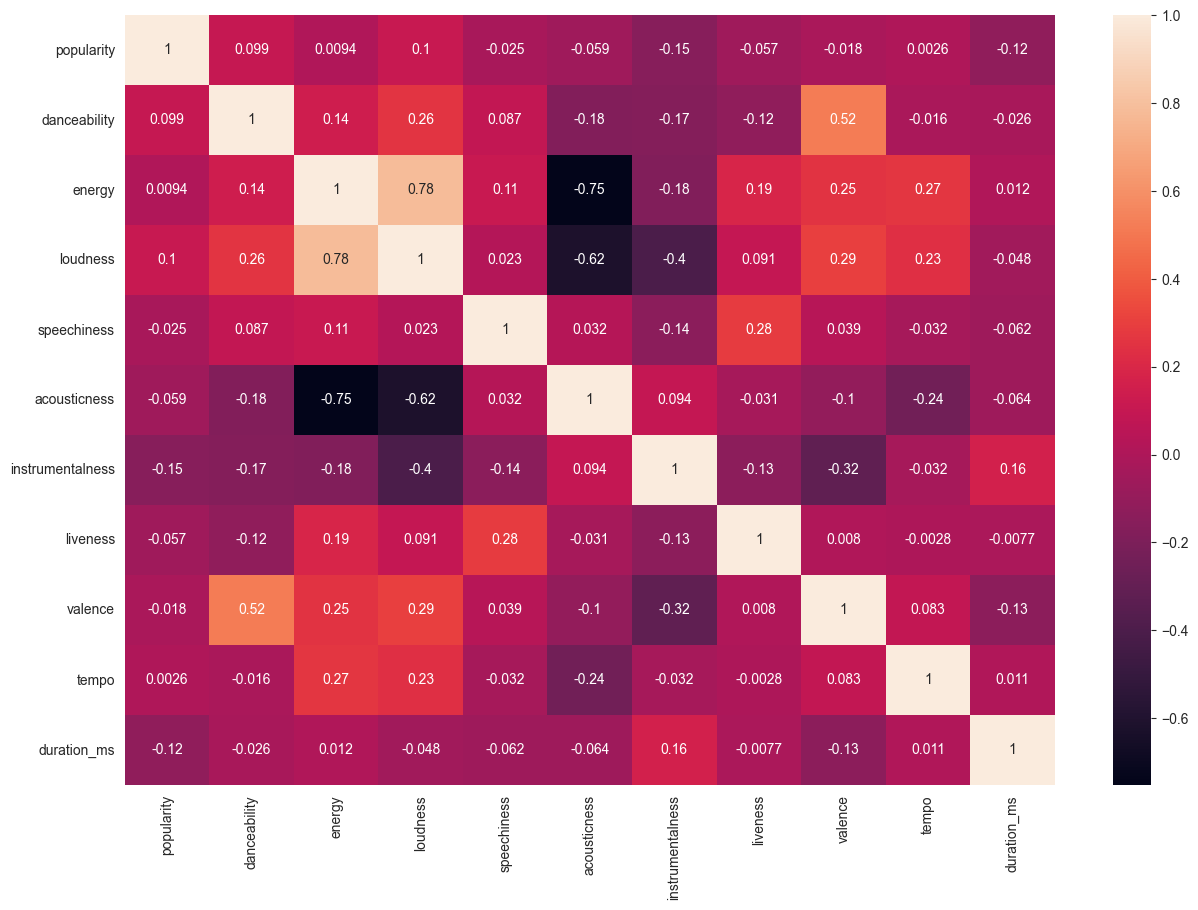

In [11]:
plt.figure(figsize=(15, 10))
sns.heatmap(df[numerical].corr(), annot=True)

<Axes: xlabel='year', ylabel='popularity'>

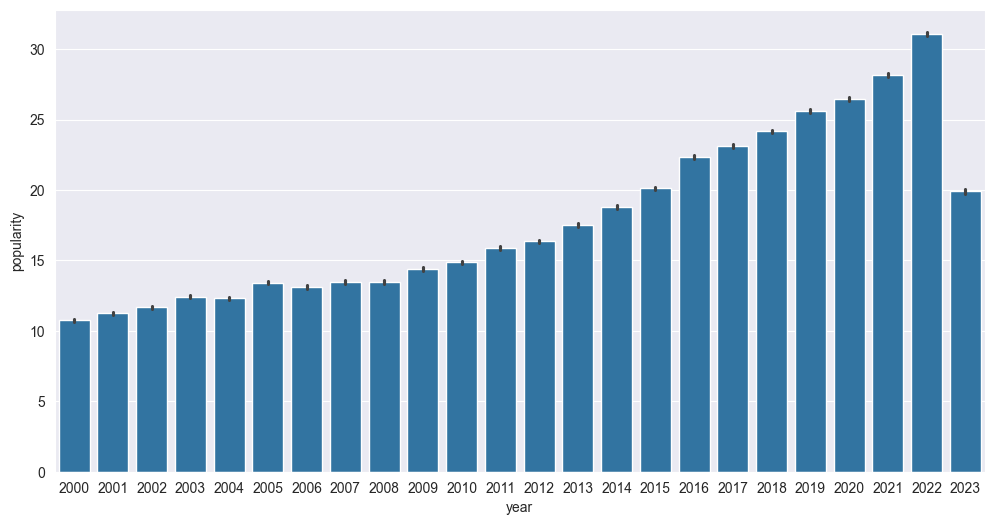

In [12]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df['year'], y=df['popularity'])

In [13]:
df['success'] = (df['popularity'] >= 50).astype(int)

<Axes: xlabel='year', ylabel='success'>

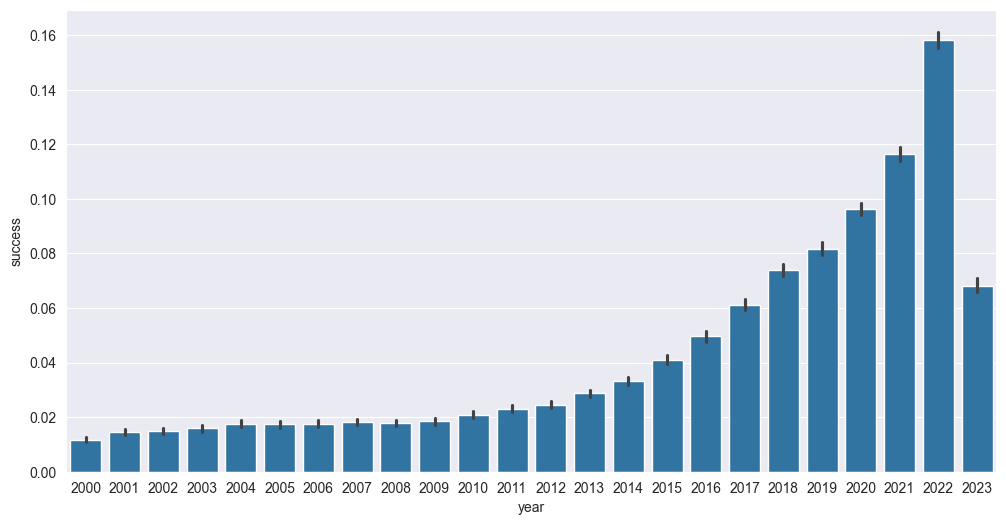

In [14]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df['year'], y=df['success'])

In [15]:
df.drop('popularity', axis=1, inplace=True)

## Data selection

In [16]:
NUMERICAL_FEATURES = [
    'danceability',
    'energy',
    'loudness',
    'speechiness',
    'acousticness',
    'instrumentalness',
    'liveness',
    'valence',
    'tempo',
    'duration_ms'
]
CATEGORICAL_FEATURES = [
    'year',
    # 'artist_name',
    # 'track_name',
    # 'track_id',
    'genre',
    'key',
    'time_signature',
    'mode'
]
FEATURES = NUMERICAL_FEATURES + CATEGORICAL_FEATURES

TARGET = 'success'

In [17]:
features_target = df[FEATURES + [TARGET]]
features_target.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year,genre,key,time_signature,mode,success
0,0.4830,0.3030,-10.0580,0.0429,0.6940,0.0000,0.1150,0.1390,133.4060,240166,2012,acoustic,4,3,1,1
1,0.5720,0.4540,-10.2860,0.0258,0.4770,0.0000,0.0974,0.5150,140.1820,216387,2012,acoustic,3,4,1,1
2,0.4090,0.2340,-13.7110,0.0323,0.3380,0.0001,0.0895,0.1450,139.8320,158960,2012,acoustic,3,4,1,1
3,0.3920,0.2510,-9.8450,0.0363,0.8070,0.0000,0.0797,0.5080,204.9610,304293,2012,acoustic,10,4,1,1
4,0.4300,0.7910,-5.4190,0.0302,0.0726,0.0193,0.1100,0.2170,171.8640,244320,2012,acoustic,6,4,0,1


## train data and test data

In [19]:
train_data, test_data = train_test_split(features_target, random_state=42)
# train_data, test_data = train_test_split(features_target, random_state=42, train_size=0.1)

train_input = train_data[FEATURES]
train_output = train_data[TARGET]

test_input = test_data[FEATURES]
test_output = test_data[TARGET]

## Pipelines

In [20]:
numerical_transformer = Pipeline([
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('numerical', numerical_transformer, NUMERICAL_FEATURES),
    ('categorical', categorical_transformer, CATEGORICAL_FEATURES),
])

def build_pipeline(estimator):
    return Pipeline([
        ('preprocessor', preprocessor),
        ('estimator', estimator),
    ]
    )

## Setting up MLFlow

In [21]:
mlflow.set_tracking_uri('http://localhost:5000')
mlflow.set_experiment('spotify_prediction')

<Experiment: artifact_location='mlflow-artifacts:/785216592154968250', creation_time=1747211524577, experiment_id='785216592154968250', last_update_time=1747211524577, lifecycle_stage='active', name='spotify_prediction', tags={}>

In [22]:
def evaluate(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    confusion_matrix_ = confusion_matrix(y_true, y_pred, normalize='true')

    mlflow.log_metric('accuracy', accuracy)
    mlflow.log_metric('precision', precision)
    mlflow.log_metric('recall', recall)
    mlflow.log_metric('f1', f1)
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    cm = confusion_matrix_
    print(f'Confusion Matrix:\n{cm}')
    sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues')
    plt.title('Confusion Matrix')
    mlflow.log_figure(plt.gcf(), 'confusion_matrix.png')

/Users/level3/Documents/level3/part2/.venv/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/level3/Documents/level3/part2/.venv/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/level3/Documents/level3/part2/.venv/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/level3/Documents/level3/part2/.venv/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Users/level3/Documents/level3/part2/.venv/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: overflow 

Accuracy: 0.9609
Precision: 0.6862
Recall: 0.2641
F1 Score: 0.3814
Confusion Matrix:
[[0.99421742 0.00578258]
 [0.73588466 0.26411534]]
🏃 View run silent-croc-88 at: http://localhost:5000/#/experiments/785216592154968250/runs/0a6bc6afc90a4d81a35f0fb627ebd23e
🧪 View experiment at: http://localhost:5000/#/experiments/785216592154968250


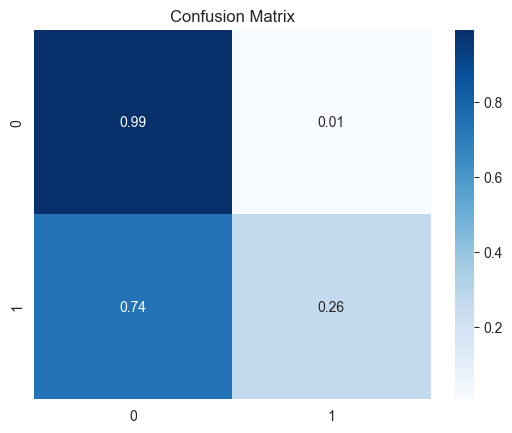

In [23]:
pipeline = build_pipeline(LogisticRegression())
pipeline.fit(train_input, train_output)

predictions = pipeline.predict(test_input)
with mlflow.start_run():
    mlflow.log_params(pipeline.get_params())
    evaluate(test_output, predictions)


2025/05/16 12:33:59 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/05/16 12:33:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Accuracy: 0.9617
Precision: 0.7550
Recall: 0.2388
F1 Score: 0.3629
Confusion Matrix:
[[0.99628831 0.00371169]
 [0.7611715  0.2388285 ]]
🏃 View run chill-pug-723 at: http://localhost:5000/#/experiments/785216592154968250/runs/212cdc5ab9a04e2da86891c54a04162e
🧪 View experiment at: http://localhost:5000/#/experiments/785216592154968250


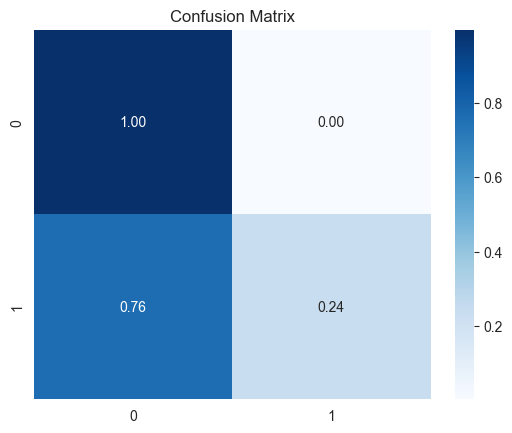

In [24]:
pipeline = build_pipeline(RandomForestClassifier(random_state=42))
pipeline.fit(train_input, train_output)

predictions = pipeline.predict(test_input)
with mlflow.start_run():
    mlflow.sklearn.log_model(pipeline, 'model')
    evaluate(test_output, predictions)


Fitting 3 folds for each of 128 candidates, totalling 384 fits
Accuracy: 0.8535
Precision: 0.2185
Recall: 0.8561
F1 Score: 0.3482
Confusion Matrix:
[[0.85340431 0.14659569]
 [0.14387077 0.85612923]]


/Users/level3/Documents/level3/part2/.venv/lib/python3.13/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/05/16 12:47:11 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
Registered model 'spotify_prediction_te

🏃 View run vaunted-loon-64 at: http://localhost:5000/#/experiments/785216592154968250/runs/143c9044f3724cb2b56c39844de34167
🧪 View experiment at: http://localhost:5000/#/experiments/785216592154968250


Created version '3' of model 'spotify_prediction_testing'.


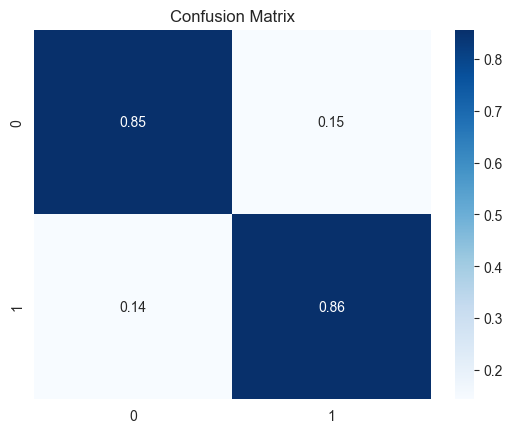

In [25]:
scale_pos_weight = 27640 / 1354

pipeline = build_pipeline(XGBClassifier(random_state=42, scale_pos_weight=scale_pos_weight, eval_metric='logloss' ))

param_grid = {
    'estimator__learning_rate': [0.01, 0.1],
    'estimator__max_depth': [3, 6],
    'estimator__n_estimators': [100, 200],
    'estimator__subsample': [0.7, 1.0],
    'estimator__colsample_bytree': [0.7, 1.0],
    'estimator__gamma': [0, 0.1],
    'estimator__min_child_weight': [1, 5]
}
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=3,
    scoring='recall',
    n_jobs=-1,
    verbose=1
)
grid_search.fit(train_input, train_output)
best_estimator = grid_search.best_estimator_
predictions = best_estimator.predict(test_input)
# mlflow.end_run()
with mlflow.start_run():
    mlflow.log_params(best_estimator.get_params())
    evaluate(test_output, predictions)

    signature = mlflow.models.infer_signature(train_input, predictions)
    mlflow.sklearn.log_model(
        sk_model=best_estimator,
        artifact_path='model',
        signature=signature,
        registered_model_name='spotify_prediction_testing'
    )